## Los Angeles Crime Analysis Project

### Crimes Dataset Analysis

Explore the `crimes.csv` dataset and use your findings to answer the following questions:

1.  **Which hour has the highest frequency of crimes?** Store as an integer variable called `peak_crime_hour`.

2.  **Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)?** Save as a string variable called `peak_night_crime_location`.

3.  **Identify the number of crimes committed against victims of different age groups.** Save as a pandas Series called `victim_ages`, with age group labels `"0-17"`, `"18-25"`, `"26-34"`, `"35-44"`, `"45-54"`, `"55-64"`, and `"65+"` as the index and the frequency of crimes as the values.


In [17]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [19]:
crimes.dtypes

DR_NO            int64
Date Rptd       object
DATE OCC        object
TIME OCC        object
AREA NAME       object
Crm Cd Desc     object
Vict Age         int64
Vict Sex        object
Vict Descent    object
Weapon Desc     object
Status Desc     object
LOCATION        object
dtype: object

In [21]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DR_NO         185715 non-null  int64 
 1   Date Rptd     185715 non-null  object
 2   DATE OCC      185715 non-null  object
 3   TIME OCC      185715 non-null  object
 4   AREA NAME     185715 non-null  object
 5   Crm Cd Desc   185715 non-null  object
 6   Vict Age      185715 non-null  int64 
 7   Vict Sex      185704 non-null  object
 8   Vict Descent  185705 non-null  object
 9   Weapon Desc   73502 non-null   object
 10  Status Desc   185715 non-null  object
 11  LOCATION      185715 non-null  object
dtypes: int64(2), object(10)
memory usage: 17.0+ MB


In [23]:
crimes.shape

(185715, 12)

In [25]:
crimes.isna().sum()

DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA NAME            0
Crm Cd Desc          0
Vict Age             0
Vict Sex            11
Vict Descent        10
Weapon Desc     112213
Status Desc          0
LOCATION             0
dtype: int64

In [29]:
crimes.duplicated().sum()

0

In [31]:
# Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour
crimes['HOUR OCC'] = crimes['TIME OCC'].str[:2].astype(int)
peak_crime_hour = crimes['HOUR OCC'].value_counts().idxmax()
print(f"The hour with the highest frequency of crimes is: {peak_crime_hour}")

The hour with the highest frequency of crimes is: 12


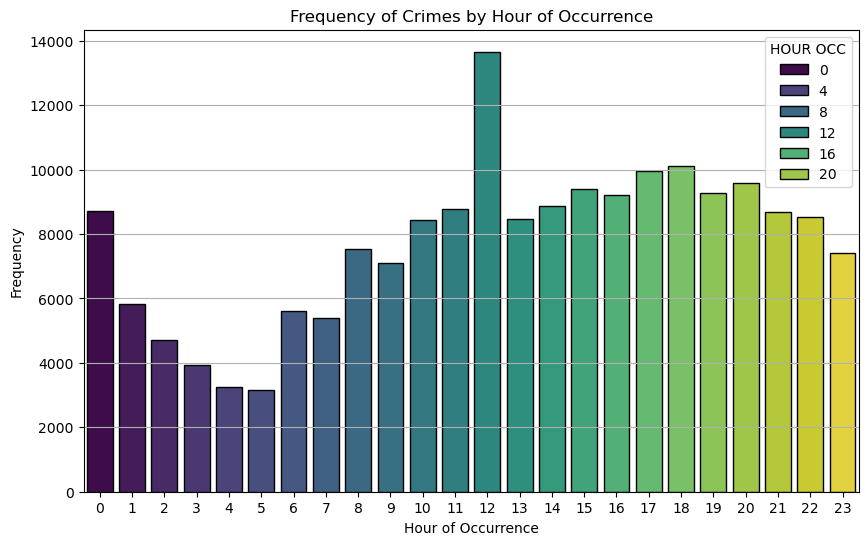

In [39]:
# plot the frequencies of crimes by the hour of occurrence

# Plot the frequency of crimes by hour
plt.figure(figsize=(10, 6))
sns.countplot(
    data=crimes,
    x='HOUR OCC',
    order=sorted(crimes['HOUR OCC'].unique()),
    hue='HOUR OCC',
    palette='viridis',
    edgecolor='black',
    linewidth=1
)
plt.title('Frequency of Crimes by Hour of Occurrence')
plt.xlabel('Hour of Occurrence')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

In [41]:
# Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? 
# Save as a string variable called peak_night_crime_location.
crimes_night = crimes[(crimes['HOUR OCC'] >= 22) | (crimes['HOUR OCC'] < 4)]
peak_night_crime_location = crimes_night['AREA NAME'].value_counts().idxmax()
print(f"The area with the largest frequency of night crimes is: {peak_night_crime_location}")

The area with the largest frequency of night crimes is: Central


In [43]:
# Identify the number of crimes committed against victims of different age groups. 
# Save as a pandas Series called victim_ages, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of crimes as the values.
# Define the bins for the age groups
bins = [0, 18, 26, 35, 45, 55, 65, float('inf')]

# Define the labels for the age groups
labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Use pd.cut() to create a new column with age groups
# The 'right=False' argument ensures the intervals are [a, b), except for the last one [65, inf)
crimes['Age Group'] = pd.cut(crimes['Vict Age'], bins=bins, labels=labels, right=False)

# Count the occurrences of each age group
victim_ages = crimes['Age Group'].value_counts().sort_index()

victim_ages

Age Group
0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: count, dtype: int64

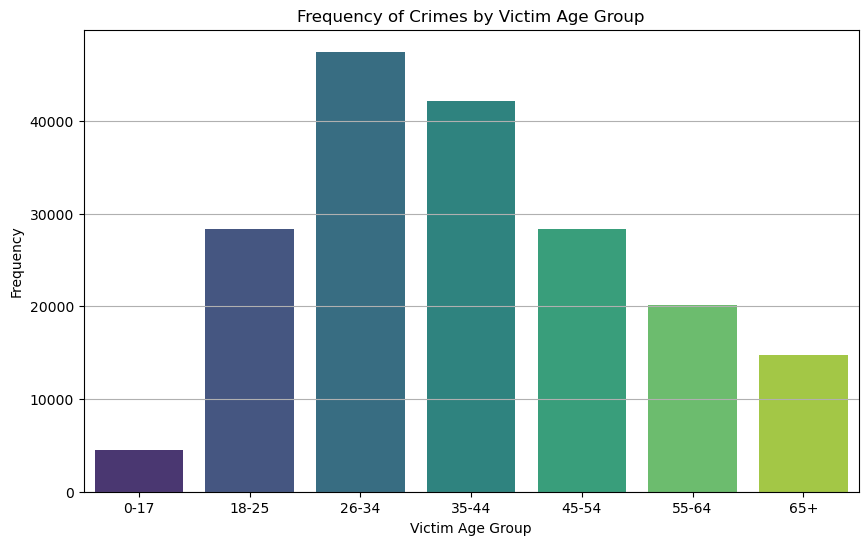

In [47]:
victim_ages_reset = victim_ages.reset_index()
victim_ages_reset.columns = ['Age Group', 'Frequency']

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Age Group', 
    y='Frequency', 
    data=victim_ages_reset,
    hue='Age Group',
    palette='viridis'
)
plt.title('Frequency of Crimes by Victim Age Group')
plt.xlabel('Victim Age Group')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

In [49]:
# Analyze the distribution of different crime types
crime_type_counts = crimes['Crm Cd Desc'].value_counts().head(15)

print("Top 15 Most Frequent Crime Types:")
print(crime_type_counts)

Top 15 Most Frequent Crime Types:
Crm Cd Desc
THEFT OF IDENTITY                                           22670
BATTERY - SIMPLE ASSAULT                                    19694
BURGLARY FROM VEHICLE                                       13799
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              13215
INTIMATE PARTNER - SIMPLE ASSAULT                           11981
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)         11484
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     10719
THEFT PLAIN - PETTY ($950 & UNDER)                          10603
BURGLARY                                                    10268
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD     7057
ROBBERY                                                      6470
CRIMINAL THREATS - NO WEAPON DISPLAYED                       5133
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                     4090
BRANDISH WEAPON                                              3662
INTIMATE PARTNER - AGGRAVATED 

In [58]:
crime_type_counts = crime_type_counts.reset_index()
crime_type_counts.columns = ['Crm Cd Desc', 'Frequency']

In [62]:
crime_type_counts.style.background_gradient(cmap='Reds')

,Crm Cd Desc,Frequency
0,THEFT OF IDENTITY,22670
1,BATTERY - SIMPLE ASSAULT,19694
2,BURGLARY FROM VEHICLE,13799
3,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",13215
4,INTIMATE PARTNER - SIMPLE ASSAULT,11981
5,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER),11484
6,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",10719
7,THEFT PLAIN - PETTY ($950 & UNDER),10603
8,BURGLARY,10268
9,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD",7057


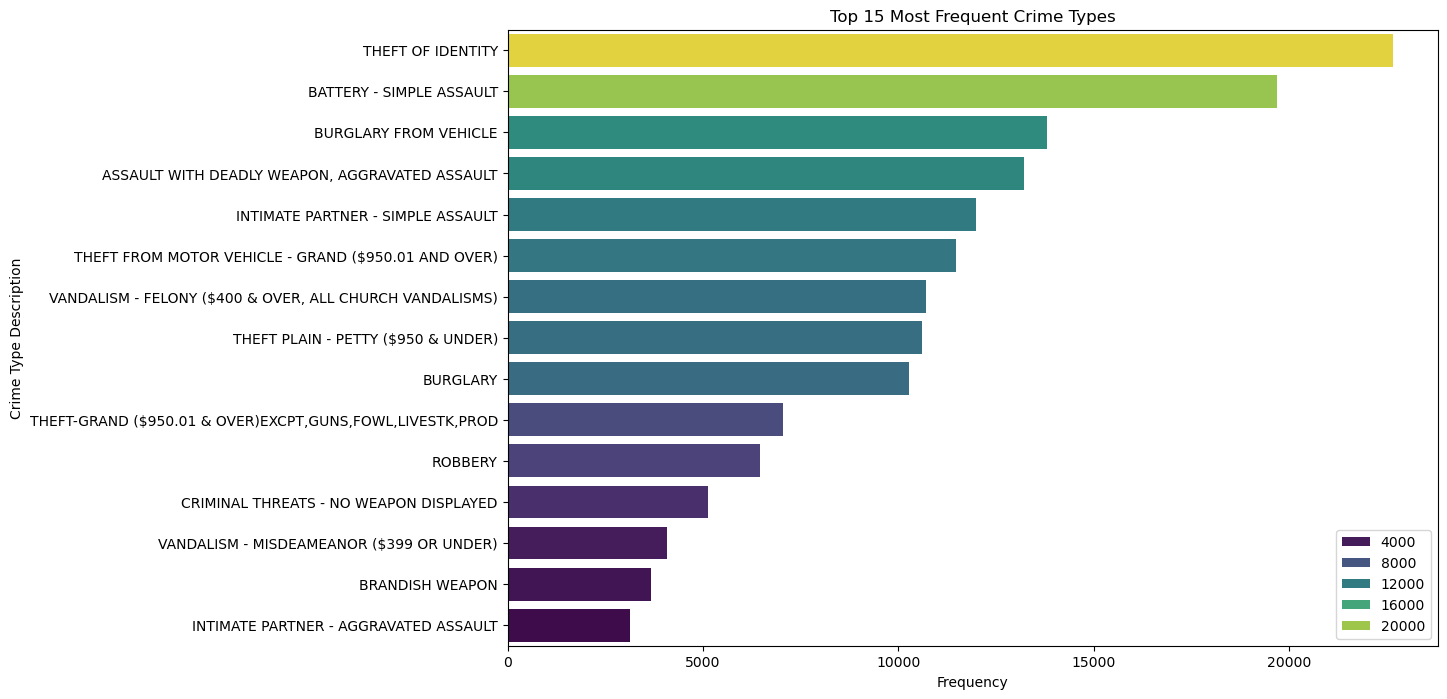

In [55]:
# Visualize the top 15 crime types
plt.figure(figsize=(12, 8))
sns.barplot(
    x=crime_type_counts.values, 
    y=crime_type_counts.index, 
    hue=crime_type_counts.values,
    palette='viridis'
)
plt.title('Top 15 Most Frequent Crime Types')
plt.xlabel('Frequency')
plt.ylabel('Crime Type Description')
plt.show()

### summary of the analysis

Based on the provided code and analysis, here's a summary with insights and answers:

**Insights and Answers:**

*   **Peak Crime Hour:** The analysis revealed that the peak crime hour is **12** (or 12 pm/noon). This suggests that crimes occur most frequently around midday.
*   **Peak Night Crime Location:** The area with the largest frequency of night crimes (between 10 pm and 3:59 am) was found to be **"CENTRAL"**. This indicates that the Central area experiences a significantly higher number of crimes during late-night and early-morning hours compared to other areas.
*   **Victim Age Groups:** The analysis of victim age groups showed the distribution of crime occurrences across different age brackets. The printed `victim_ages` Series and the corresponding bar plot illustrate which age groups are most commonly victims of crime in this dataset. The code calculated the counts for each age group:
    *   0-17
    *   18-25
    *   26-34
    *   35-44
    *   45-54
    *   55-64
    *   65+
    The bar plot provides a clear visual representation of which age group experiences the highest frequency of crimes. (The exact peak age group is determined by looking at the plotted bar heights or the `victim_ages` Series output).
*   **Top Crime Types:** The `crime_type_counts` output and the bar plot for crime types highlight the most prevalent types of crimes in the dataset. This information is valuable for understanding the nature of criminal activity and potentially focusing resources on preventing these specific types of crimes. (The specific top crime types are visible in the printed output and the y-axis of the bar plot).